In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

In [2]:
'''
官方文档：
    scikit-learn comes with a few small standard datasets that do not 
require to download any file from some external website.
'''

iris_dataset = load_iris()
# 观察到 load_iris 函数返回的是一个Bunch对象
type(iris_dataset)

sklearn.utils._bunch.Bunch

In [3]:
# 其与字典非常相似，包含了键值对
print("Keys of iris_dataset: \n{}".format(iris_dataset.keys()))

Keys of iris_dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [4]:
# 得到数据集和标签（numpy arr）
X, y = iris_dataset['data'], iris_dataset['target']

# 转换为pandas dataframe
X = pd.DataFrame(X, columns = iris_dataset['feature_names'])
y = pd.DataFrame(y, columns = ['Type'])

X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


array([[<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (c

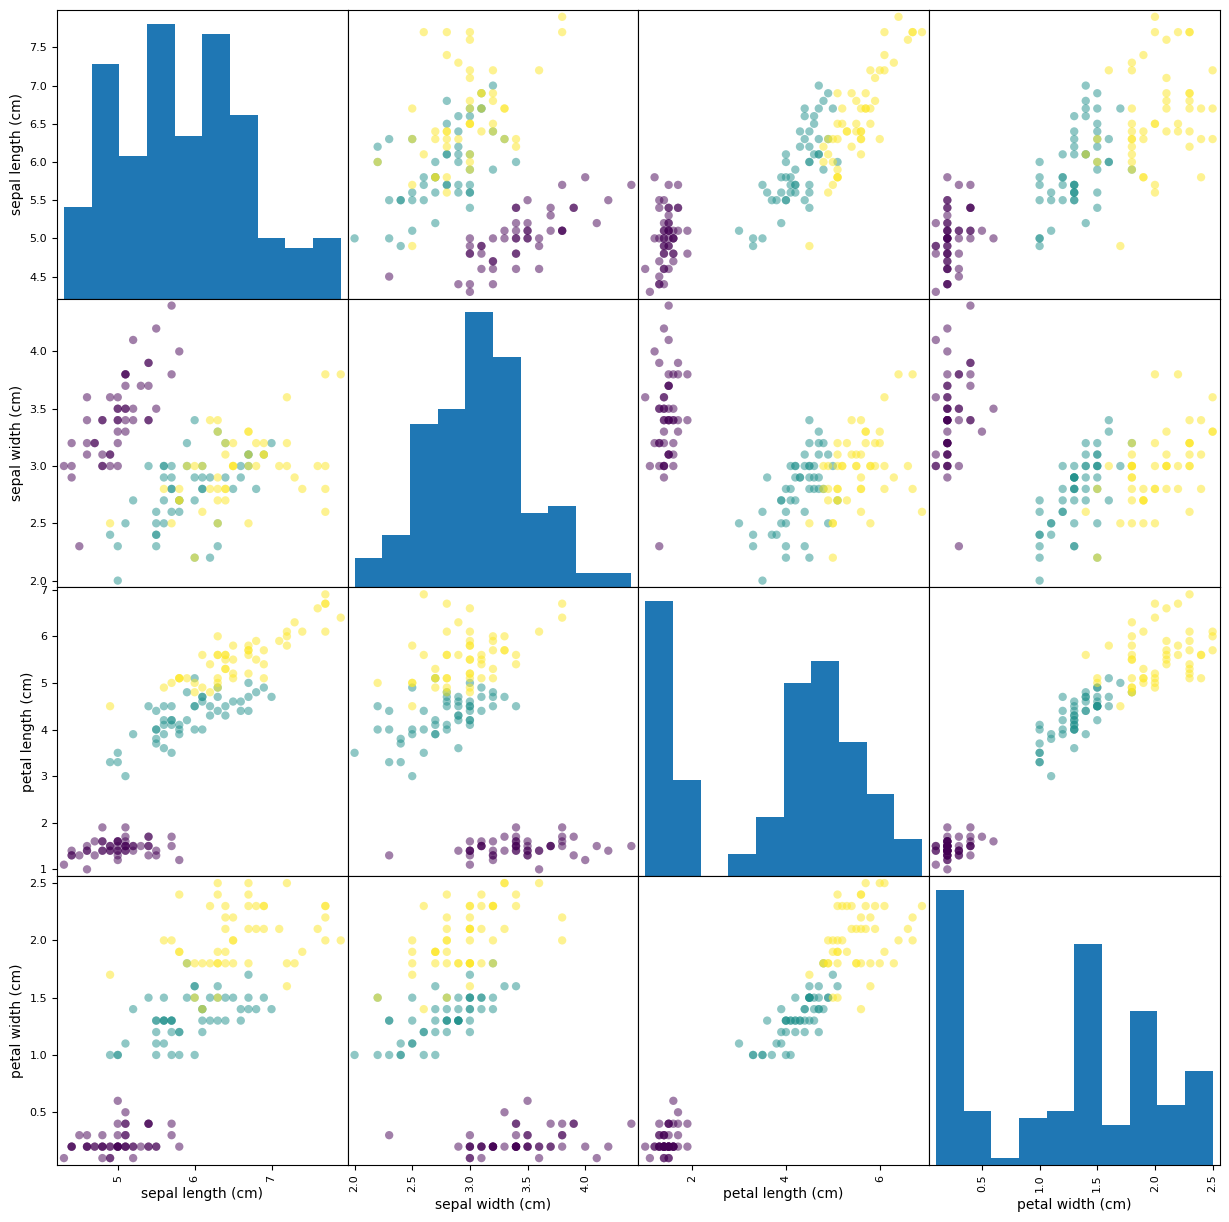

In [5]:
# 这里指定颜色的参数‘c'不接受dataframe，但可以接受np arr / pd series
pd.plotting.scatter_matrix(X, c = iris_dataset['target'], figsize = (15, 15), marker = 'o')

为了尝试KNN分类器的功能，观察到左下角的散点图，即使用'sepal length 萼片长度'和'petal width 花瓣宽度'可以比较容易的区分三种类别。尝试删除紫色的类别，然后对剩下的两种类别进行KNN二分类。

In [6]:
# 首先得到一整个dataframe
iris_df = X.join(y)

iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
# 然后删除所有的类别为2的行
iris_df = iris_df[iris_df['Type'] != 0]

# 再删除'sepal width' & 'petal length'列
iris_df = iris_df.drop(['sepal width (cm)', 'petal length (cm)'], axis = 1)

iris_df

,sepal length (cm),petal width (cm),Type
50,7.0,1.4,1
51,6.4,1.5,1
52,6.9,1.5,1
53,5.5,1.3,1
54,6.5,1.5,1
...,...,...,...
145,6.7,2.3,2
146,6.3,1.9,2
147,6.5,2.0,2
148,6.2,2.3,2


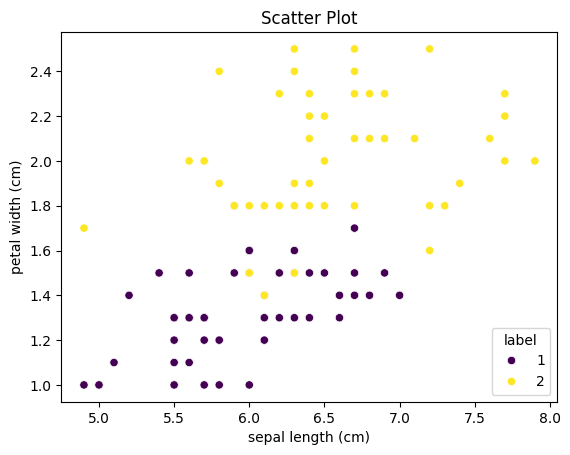

In [8]:
# 只观察关心的散点图
sns.scatterplot(x = iris_df['sepal length (cm)'], y = iris_df['petal width (cm)'], hue = iris_df['Type'], 
                palette = 'viridis', marker = 'o')

# 设置图形属性
plt.title('Scatter Plot')
# 增加图例
plt.legend(title = 'label', loc = 'lower right')
plt.show()

Test set accuracy is: 0.90


c:\Users\MagicBoy Zhang\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


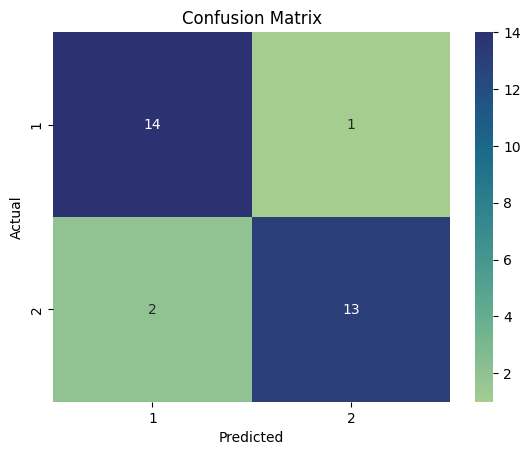

In [9]:
'''
训练KNN分类器模型
'''
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KNeighborsClassifier

# step0 得到X，所有的特征；和y，目标变量
X = iris_df.drop(['Type'], axis = 1)
y = iris_df[['Type']]

# step1 分离训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 13, test_size = 0.3)

# step2 创建KNN分类器(此处为1-NN)
knn_clf = KNeighborsClassifier(n_neighbors = 1)

# step3 使分类器拟合训练集，KNN的拟合过程就只是把训练集保存起来
knn_clf.fit(X_train, y_train)

'''
评估KNN模型
'''
# step4 评估模型，计算其精确度
print('Test set accuracy is: {:.2f}'.format(knn_clf.score(X_test, y_test)))

# 查看一下混淆矩阵
y_pred = knn_clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred, labels = [1, 2])

# 使用seaborn绘制热力图
sns.heatmap(conf_matrix, annot = True, cmap = "crest", xticklabels = [1, 2], yticklabels = [1, 2])

# 设置图形属性
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### ================= 绘图 =================

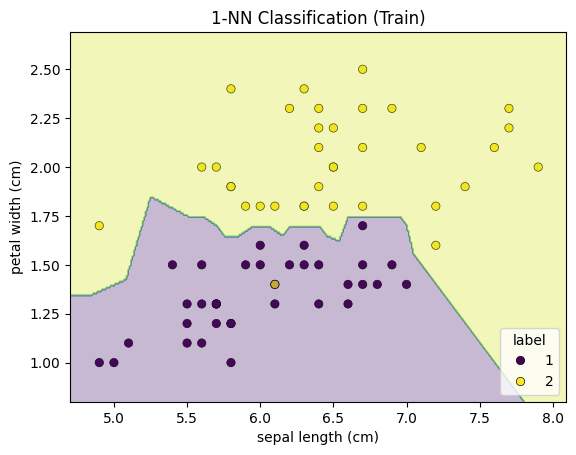

In [10]:
import sys
sys.path.append("../..")

from ToolKit.ML import plot_decision_boundary2F2D

plot_decision_boundary2F2D(X_train, X_test, y_train, y_test, knn_clf, 'train', '1-NN Classification (Train)')

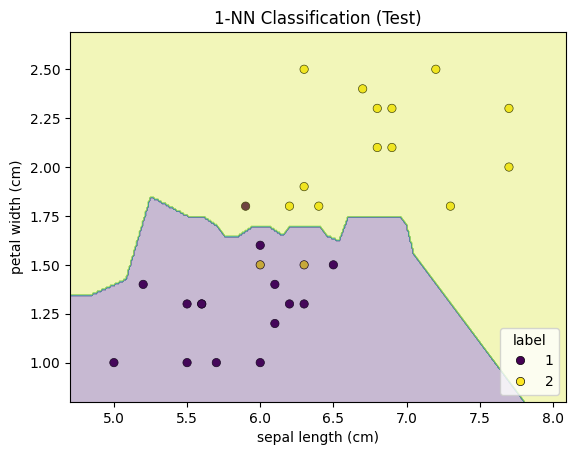

In [11]:
plot_decision_boundary2F2D(X_train, X_test, y_train, y_test, knn_clf, 'test', '1-NN Classification (Test)')

In [12]:
knn_clf = KNeighborsClassifier(n_neighbors = 3)

knn_clf.fit(X_train, y_train)

knn_clf.score(X_test, y_test)

c:\Users\MagicBoy Zhang\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9

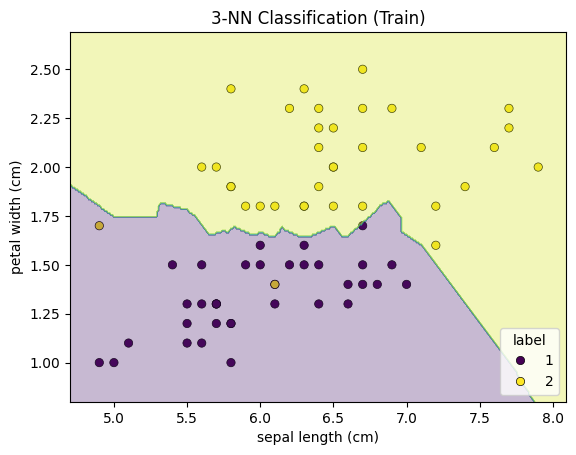

In [13]:
plot_decision_boundary2F2D(X_train, X_test, y_train, y_test, knn_clf, 'train', '3-NN Classification (Train)')

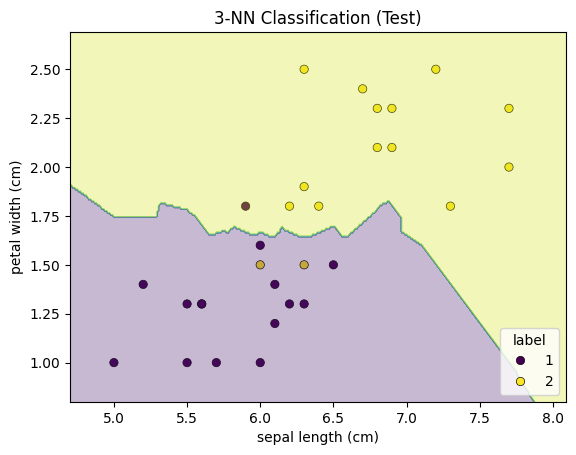

In [14]:
plot_decision_boundary2F2D(X_train, X_test, y_train, y_test, knn_clf, 'test', '3-NN Classification (Test)')

In [15]:
knn_clf = KNeighborsClassifier(n_neighbors = 5)

knn_clf.fit(X_train, y_train)

knn_clf.score(X_test, y_test)

c:\Users\MagicBoy Zhang\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9

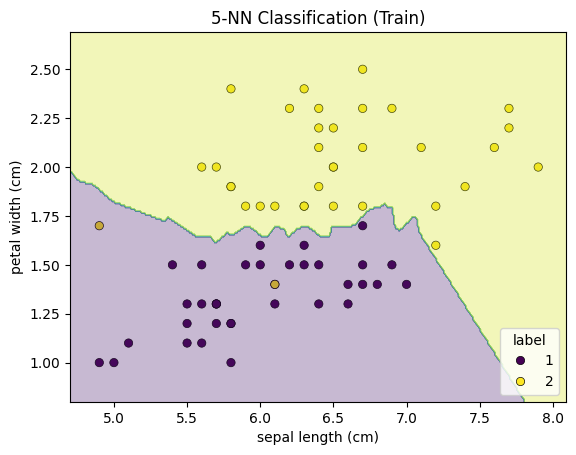

In [16]:
plot_decision_boundary2F2D(X_train, X_test, y_train, y_test, knn_clf, 'train', '5-NN Classification (Train)')

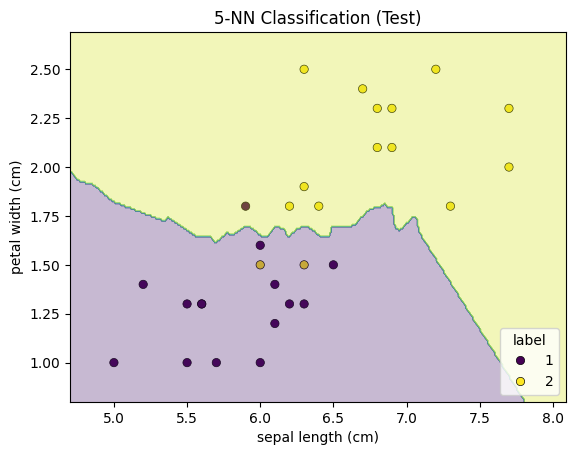

In [17]:
plot_decision_boundary2F2D(X_train, X_test, y_train, y_test, knn_clf, 'test', '5-NN Classification (Test)')

In [18]:
knn_clf = KNeighborsClassifier(n_neighbors = 30)

knn_clf.fit(X_train, y_train)

knn_clf.score(X_test, y_test)

c:\Users\MagicBoy Zhang\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9333333333333333

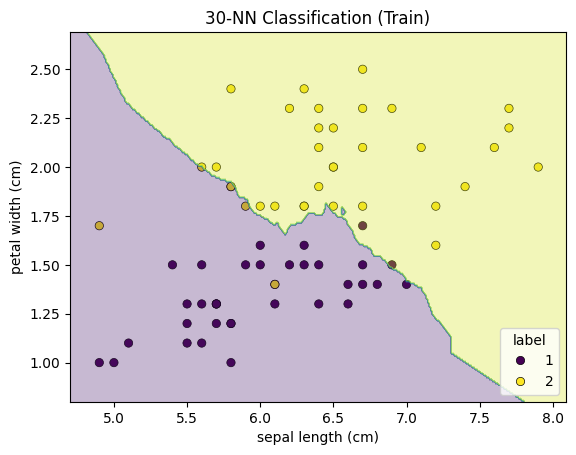

In [19]:
plot_decision_boundary2F2D(X_train, X_test, y_train, y_test, knn_clf, 'train', '30-NN Classification (Train)')

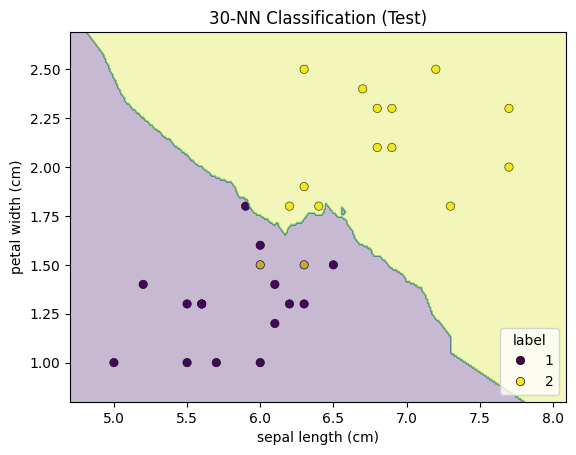

In [20]:
plot_decision_boundary2F2D(X_train, X_test, y_train, y_test, knn_clf, 'test', '30-NN Classification (Test)')